In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import scipy

In [24]:
adata=sc.read_h5ad("ribas/NSCL/NSCL_5p_SCVI_MERGED.h5")

In [26]:
clusters=pd.read_csv("ribas/DEGs/NSCL_5p_clusters")
df=pd.DataFrame({"barcode":adata.obs_names,"cluster":pd.Categorical(clusters["PhenoGraph_clusters"])})
df.to_csv("NSCL_5p_barcode_clusters.csv")

In [13]:
# Palette for phenograph clusters
pmap2=[ "#010067","#9E008E","#FFE502","#005F39","#00FF00","#FF937E",
          "#A42400","#001544","#91D0CB","#620E00","#0000FF","#007DB5","#6A826C","#00AE7E","#C28C9F",
          "#BE9970","#008F9C","#5FAD4E","#FF0000","#FF00F6","#FF029D","#683D3B","#FF74A3","#968AE8","#98FF52",
          "#A75740","#01FFFE","#FFEEE8","#FE8900","#BDC6FF","#01D0FF","#BB8800","#7544B1","#A5FFD2","#FFA6FE",
          "#774D00","#7A4782","#263400","#004754","#43002C","#B500FF","#FFB167","#FFDB66","#90FB92","#7E2DD2",
          "#BDD393","#E56FFE","#DEFF74","#00FF78","#009BFF","#006401","#0076FF","#85A900","#00B917","#788231",
          "#00FFC6","#FF6E41","#E85EBE"]

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 26.873092889785767 seconds
Jaccard graph constructed in 16.261828422546387 seconds
Wrote graph to binary file in 3.938037157058716 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.877053
After 2 runs, maximum modularity is Q = 0.878477
Louvain completed 22 runs in 19.3491952419281 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 78.49545240402222 seconds


... storing 'sample' as categorical
... storing 'celltype' as categorical


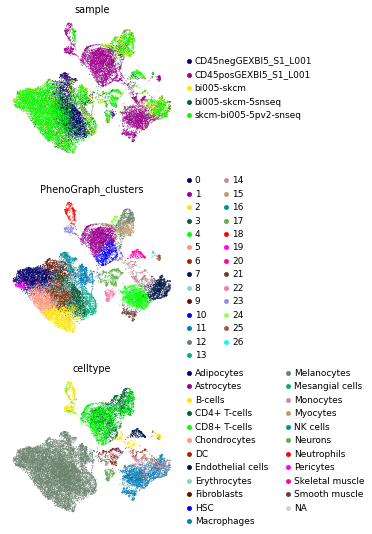

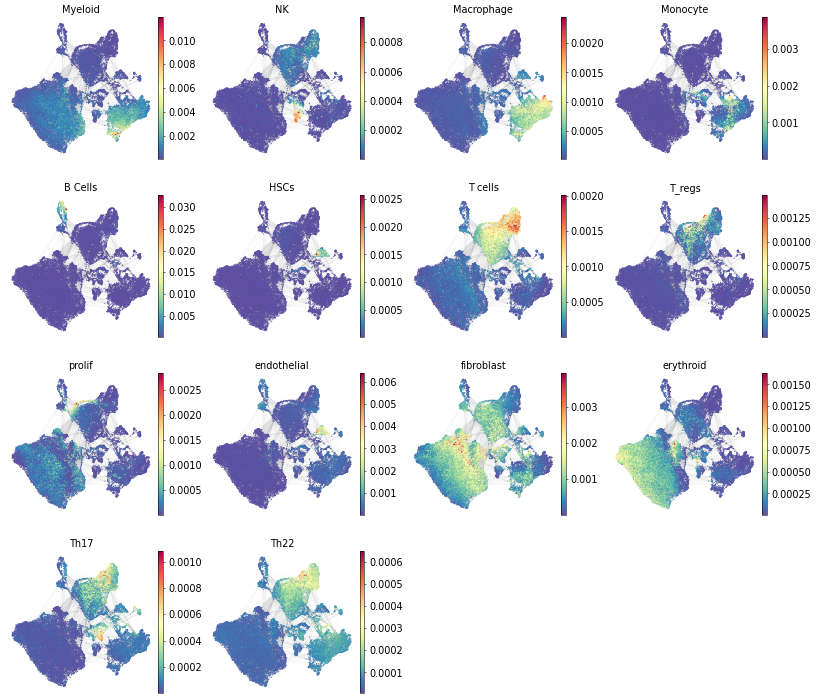

In [36]:
ttest_degs(adata,"bi005")

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 29.643603563308716 seconds
Jaccard graph constructed in 16.254273414611816 seconds
Wrote graph to binary file in 1.2776212692260742 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.853124
After 2 runs, maximum modularity is Q = 0.854613
After 3 runs, maximum modularity is Q = 0.856576
After 12 runs, maximum modularity is Q = 0.859187
Louvain completed 32 runs in 36.01694917678833 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 96.72713255882263 seconds


... storing 'sample' as categorical
... storing 'celltype' as categorical


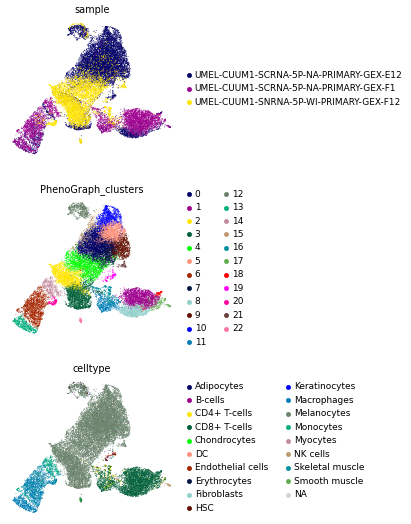

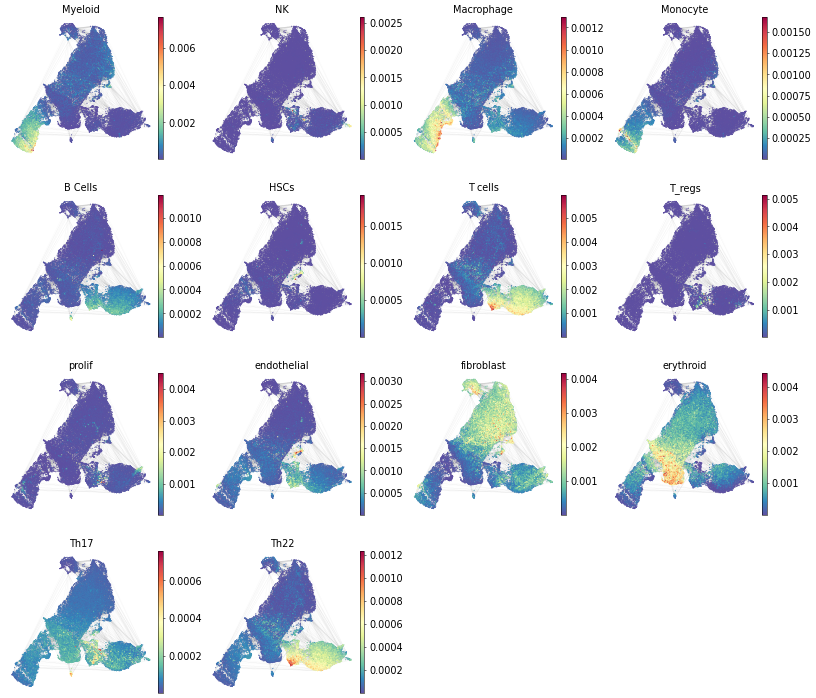

In [34]:
ttest_degs(adata,"UMEL")

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 91.46129584312439 seconds
Jaccard graph constructed in 18.504279613494873 seconds
Wrote graph to binary file in 7.911487102508545 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.869628
After 2 runs, maximum modularity is Q = 0.870642
After 10 runs, maximum modularity is Q = 0.872347
Louvain completed 30 runs in 61.67895984649658 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 191.146719455719 seconds


... storing 'sample' as categorical
... storing 'celltype' as categorical


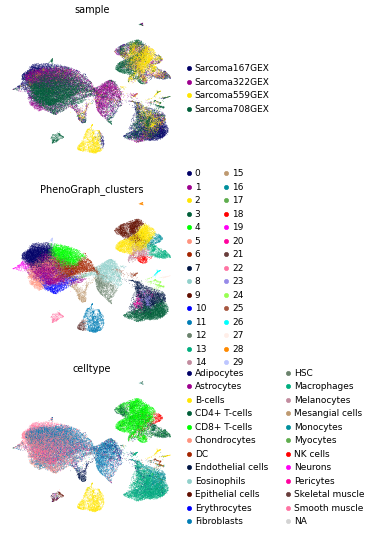

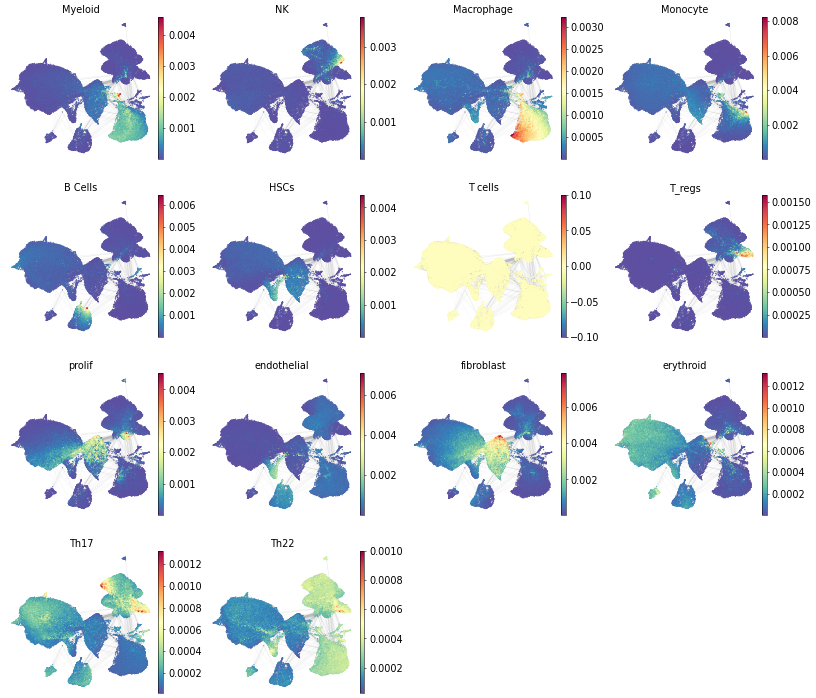

In [32]:
ttest_degs(adata,"Sarcoma")

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 22.343263864517212 seconds
Jaccard graph constructed in 10.664890050888062 seconds
Wrote graph to binary file in 3.0803334712982178 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.863408
After 10 runs, maximum modularity is Q = 0.864479
Louvain completed 30 runs in 20.448233127593994 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 64.07047629356384 seconds


... storing 'sample' as categorical
... storing 'celltype' as categorical


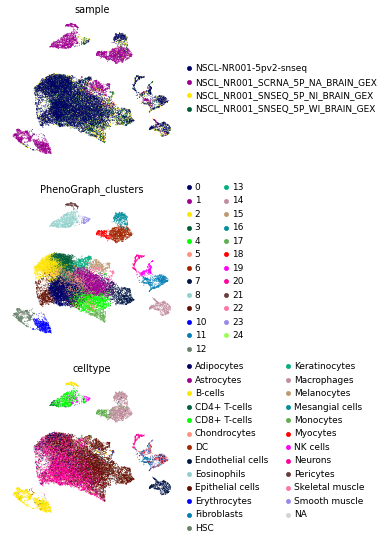

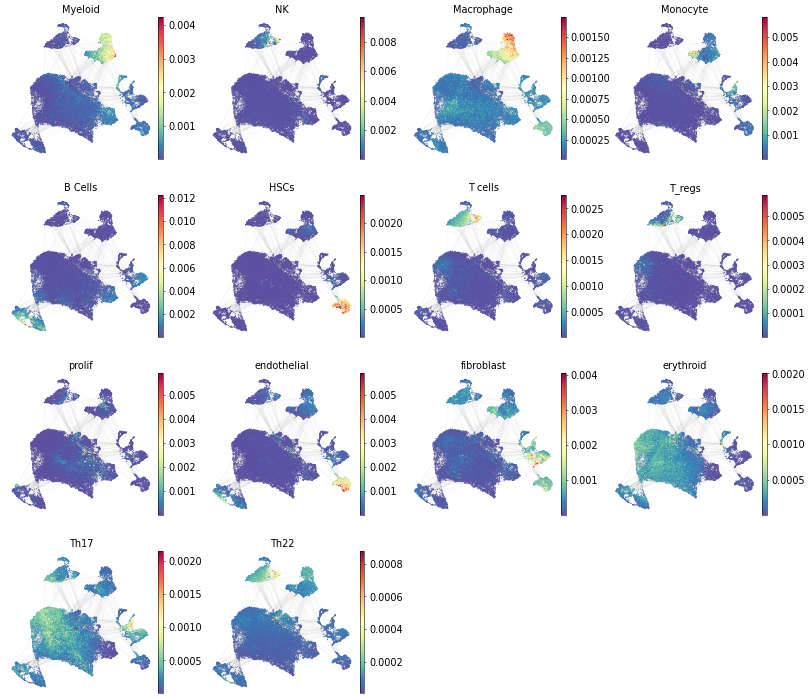

In [24]:
ttest_degs(adata,"NSCL_5p")

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 53.246026039123535 seconds
Jaccard graph constructed in 14.169760942459106 seconds
Wrote graph to binary file in 5.0496416091918945 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.842675
After 8 runs, maximum modularity is Q = 0.843704
After 28 runs, maximum modularity is Q = 0.845714
Louvain completed 48 runs in 63.55316662788391 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 145.72722125053406 seconds


... storing 'sample' as categorical
... storing 'celltype' as categorical


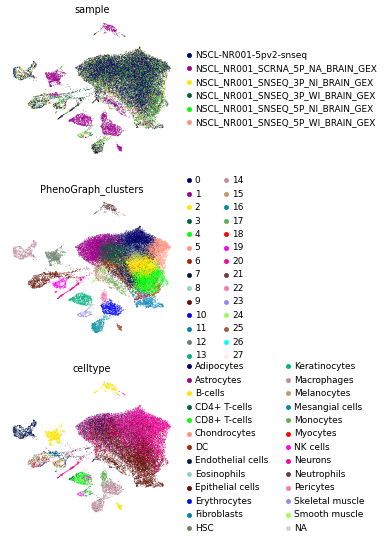

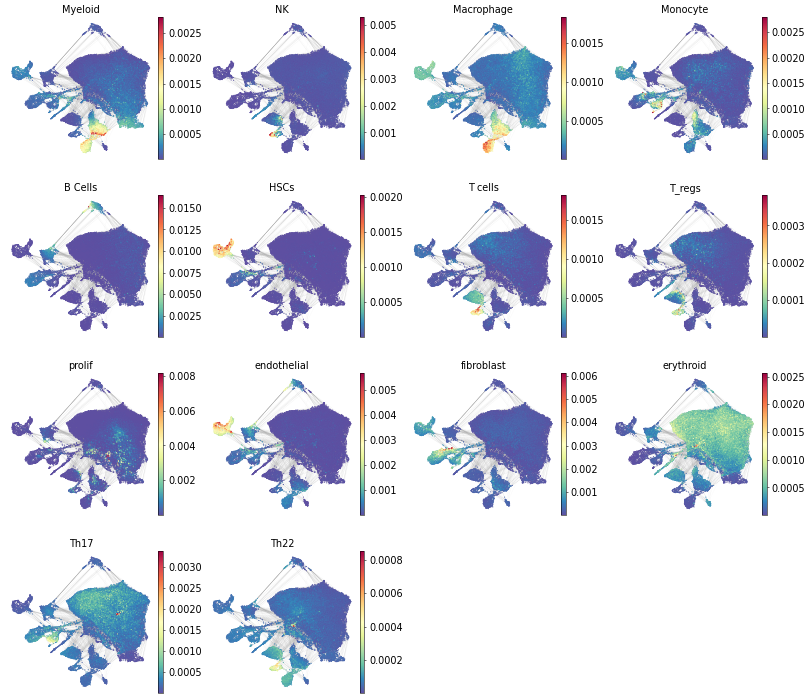

In [30]:
ttest_degs(adata,"NSCL_full")

In [30]:
adata=sc.read_h5ad("ribas/NSCL/NSCL_full_SCVI_MERGED.h5")

         Falling back to preprocessing with `sc.pp.pca` and default params.


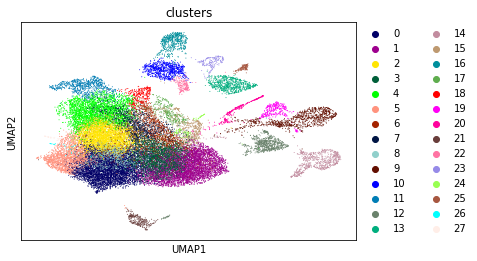

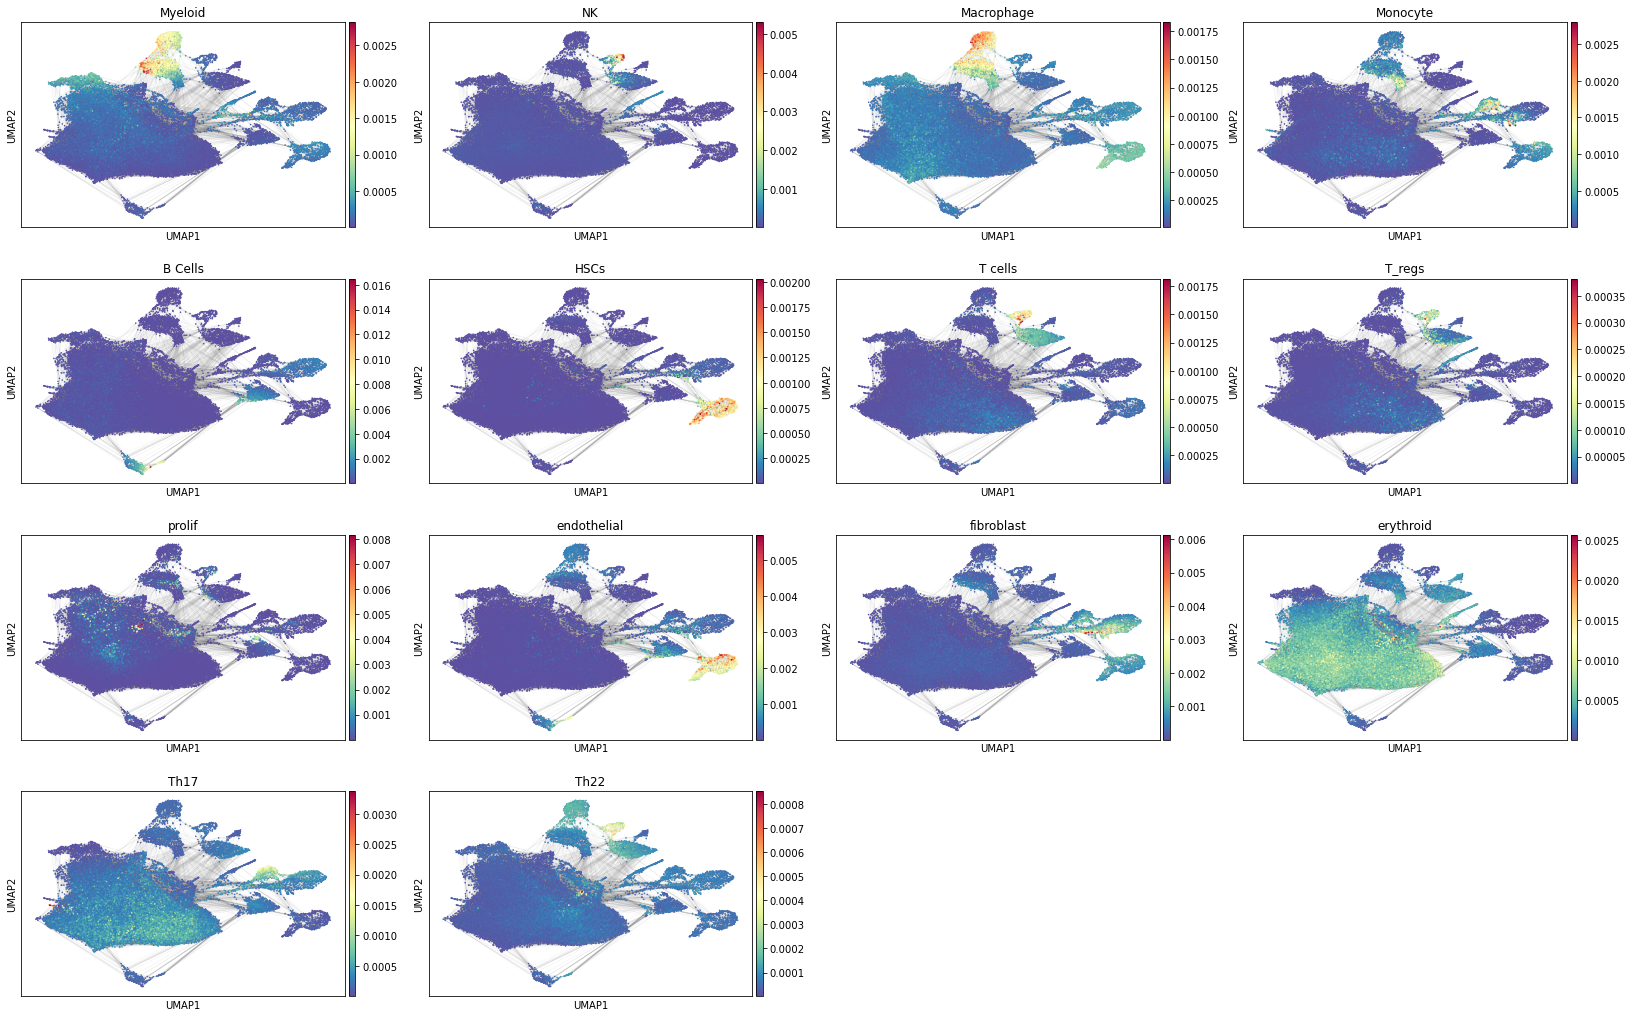

In [31]:
normed=sc.AnnData(adata.layers["scvi_normalized"])
normed.var_names=adata.var_names
clusters=pd.Categorical(pd.read_csv("ribas/DEGs/NSCL_full_clusters")["PhenoGraph_clusters"])
normed.obs["clusters"]=clusters
sc.pp.neighbors(normed)
sc.tl.umap(normed)

temp=[str(i) for i in range(20)]
sigs=pd.read_csv("gene_sigs.csv",names=temp,skiprows=[0])

adata_df=normed.to_df()
    
#create cell signature markers by averaging expression for each cell across all gene markers
sigs_np=np.asarray(sigs)
signatures=[]
for i in range(sigs_np.shape[0]):
    temp=[]
    for j in range(sigs_np.shape[1]):
        if pd.isnull(sigs_np[i][j])==False:
            if sigs_np[i][j] in adata_df.columns:
                temp.append(adata_df[sigs_np[i][j]])
    if len(temp)==0:
        signatures.append([0 for k in range(adata_df.shape[0])])
    else:
        signatures.append(np.mean(temp,axis=0))    

signatures=np.asarray(signatures)

signatures=pd.DataFrame(np.transpose(signatures), columns=sigs.index)

signatures_types=sigs.index
signatures=np.asarray(signatures)
for i in range(signatures.shape[1]):
    normed.obs[signatures_types[i]]=signatures[:,i]

        
sc.pl.umap(normed,color="clusters",palette=pmap2,save="NSCL_full_clusters.pdf")

sc.pl.umap(
        normed, 
        color=sigs.index,
        palette='tab20', color_map='Spectral_r', 
        edges = True, edges_width = 0.025,
        s=10,
    save="NSCL_full_markers.pdf"
    )

In [23]:
def ttest_degs(adata,sample):
    normed=sc.AnnData(adata.layers["scvi_normalized"])
    normed.obs["sample"]=list(adata.obs["orig.ident"])
    normed.obs["celltype"]=list(adata.obs["celltype_bped_main"])

    #pca of n_components
    sc.pp.pca(normed, n_comps= 50)

    communities, graph, Q = sc.external.tl.phenograph(pd.DataFrame(normed.obsm['X_pca']), k = 30)

    normed.var_names=adata.var_names

    normed.obs['PhenoGraph_clusters'] = pd.Categorical(communities)
    normed.uns['PhenoGraph_Q'] = Q

    sc.pp.neighbors(normed)
    sc.tl.umap(normed)

    sc.pl.umap(normed,color=["sample","PhenoGraph_clusters","celltype"],palette=pmap2,ncols=1)

    sc.tl.rank_genes_groups(normed, 'PhenoGraph_clusters', method='t-test', key_added = "t-test")

    ttest=pd.DataFrame()
    for i in np.unique(normed.obs["PhenoGraph_clusters"]):
        genelist=[]
        counts=0
        ttest_ii=sc.get.rank_genes_groups_df(normed,key='t-test',group=str(i))["names"]
        j=0
        while counts<=250:
            if ("MT-" not in ttest_ii[j]) and ("RPS" not in ttest_ii[j]) and ("RPL" not in ttest_ii[j]):
                genelist.append(ttest_ii[j])
                counts+=1
            j+=1

        ttest["Cluster "+str(i)]=genelist

    ttest.to_csv("ribas/DEGs/"+sample+"_ttest",index_label=0,index=False)
    normed.obs['PhenoGraph_clusters'].to_csv("ribas/DEGs/"+sample+"_clusters",index_label=0,index=False)
    pd.DataFrame(normed.obsm['X_umap']).to_csv("ribas/DEGs/"+sample+"_umap",index_label=0,index=False)

    temp=[str(i) for i in range(20)]
    sigs=pd.read_csv("gene_sigs.csv",names=temp,skiprows=[0])

    adata_df=normed.to_df()

    #create cell signature markers by averaging expression for each cell across all gene markers
    sigs_np=np.asarray(sigs)
    signatures=[]
    for i in range(sigs_np.shape[0]):
        temp=[]
        for j in range(sigs_np.shape[1]):
            if pd.isnull(sigs_np[i][j])==False:
                if sigs_np[i][j] in adata_df.columns:
                    temp.append(adata_df[sigs_np[i][j]])
        if len(temp)==0:
            signatures.append([0 for k in range(adata_df.shape[0])])
        else:
            signatures.append(np.mean(temp,axis=0))    

    signatures=np.asarray(signatures)

    signatures=pd.DataFrame(np.transpose(signatures), columns=sigs.index)

    signatures_types=sigs.index
    signatures=np.asarray(signatures)
    for i in range(signatures.shape[1]):
        normed.obs[signatures_types[i]]=signatures[:,i]

    sc.set_figure_params(dpi=50, frameon = None)
    sc.pl.umap(
        normed, 
        color=sigs.index,
        palette='tab20', color_map='Spectral_r', 
        edges = True, edges_width = 0.025,
        s=10
    )

In [27]:
pd.read_csv("ribas/DEGs/NSCL_5p_ttest")

Cluster 0 Cluster 1   Cluster 2   Cluster 3    Cluster 4   Cluster 5  \
0         TPD52     ERP29        WWP1      GOLPH3      ONECUT2      CNOT11   
1         GDAP1    ERGIC3  AC012494.1         HGD     KIAA1324       SOCS7   
2           NNT     NORAD        XRN2        WWP1          SYP  AL355834.2   
3         RIMS2     TMEM9      ZNF626     ARHGAP5       ATP2A3       PPIL2   
4        CD99L2     MMGT1        IRS2       PPIL2        KCNH6        PATJ   
..          ...       ...         ...         ...          ...         ...   
246       DISC1    TSPAN3       DOCK1     FAM177B       C2CD4A      ADRA1A   
247         DAP      TFF3   LINC01687       NLRP1      SLC38A3       ACSL5   
248     RALGPS1       NTS      DNAH14       TGIF1       GABRA2        SOX4   
249  ADARB2-AS1   ATP6V0B       TRIB3  AC009226.1  AC009237.14       JADE1   
250       EPHX2    UBE2L5       ITGA1     LURAP1L   AC093893.1  AC092683.1   

     Cluster 6 Cluster 7   Cluster 8   Cluster 9  ... Cluster 15 Cluster 16  \
0       TYROBP   FAM174C        TMA7       GNGT1  ...      DUSP4      DOCK2   
1         AIF1    DDRGK1         FAU       GDAP1  ...     ATP1B1      LRMDA   
2       TMSB4X     LMAN2     ARHGDIB  AL163541.1  ...     PWWP2B     PLXDC2   
3       FCER1G    ERGIC3  AC099560.1   MIR2052HG  ...    SMARCD2      IFI16   
4       ARPC1B  KIAA2013      GAREM1  AC106799.2  ...      ECHS1      ITPR2   
..         ...       ...         ...         ...  ...        ...        ...   
246      PLCL2   CHCHD10     ZFP36L1       FAAH2  ...      GRHL2      CSF1R   
247      IL1RN     FGFR4      ENOPH1        NFIB  ...     CAPNS1      AP2M1   
248   TBC1D22A   SLC10A3      HNRNPU     C1QTNF3  ...   CATSPERB       ZNF8   
249     SMIM30   NDUFB11       KLRG1      NDUFS4  ...     S100A6      HLA-E   
250  LINC01094     GAPDH      SHISA5       ABHD2  ...    ATP5MPL       PLEK   

       Cluster 17 Cluster 18 Cluster 19  Cluster 20  Cluster 21  Cluster 22  \
0    SLC25A25-AS1     TYROBP       BMP1      GLIPR2       UBA52      SNHG16   
1       LINC01935       OAZ1      RAB31         DST         FAU      TOMM20   
2            DHFR     TMSB10     MARCKS  AC104596.1       TOMM7      RSL1D1   
3      AC092683.1     FCER1G       TPM4       SGIP1  AC099560.1        BAG1   
4         CAMK2N1    GABARAP     SPTBN1       VGLL4        CD52       VMA21   
..            ...        ...        ...         ...         ...         ...   
246           ASL    ANKRD22     PDLIM7       KLHL5       ESYT2       ROMO1   
247       FAM174B        RB1      SYT12   LINC00639         LYN        GNAS   
248         MS4A8       CTSH     PIEZO2        ANK3        LFNG       HSPA8   
249    AC007991.3       MNDA      FLRT2      ZNF536        TSKU  FP236383.3   
250         KCNT1      APLP2      CHST3       SSBP2     TRMT112     ANAPC11   

    Cluster 23  Cluster 24  
0         LCP2        BOD1  
1        DOCK2     RANBP17  
2     TNFRSF1B      NDUFS4  
3       DOCK11       ARL15  
4        SYNE2        HEIH  
..         ...         ...  
246   MIR155HG  AL021918.5  
247      SCLT1    C12orf65  
248       PEPD  AC073578.1  
249       TET1    MIR222HG  
250      ACTN1        TBCA  

[251 rows x 25 columns]

In [21]:
genes.to_csv("ribas/DEGs/sarcoma_degs")

In [22]:
normed.obs['PhenoGraph_clusters'].to_csv("ribas/DEGs/sarcoma_clusters")
pd.DataFrame(normed.obsm['X_umap']).to_csv("ribas/DEGs/sarcoma_umap")

In [8]:
def diff(points):
    diff=[]
    for i in range(1,points):
        diff.append(points[i]-points[i-1])
    return diff

In [33]:
def find_knee(y_points):
    '''
    find the knee point of a graph (assumes evenly spaced points so I am ignoring change in x)
    '''
    y_points = y_points * 1e8
    
    #find where the points become negative
    first_neg=len(y_points)
    for i in range(len(y_points)):
        if y_points[i]<0:
            first_neg=i
            break
            
    y1 = np.diff(y_points[0:first_neg]) #first derivative
    y2 = np.diff(y_points[0:first_neg], n=2) #second derivative
    

    
    R = abs((1+y1[0:len(y1)-1]**2)**(3/2)/y2)
    print(np.argsort(R))
    print(y1[0],y2[0],R[0])
    print(y1[110],y2[110],R[110])

In [17]:
#THIS IS THE FIXED VERSION TO USE WHEN WE REDO THINGS
def deg(adata, num, names=True, annot="PhenoGraph_clusters"):
    #returns a list of DEGs found across all clusters
    #num = number of degs to choose for each cluster
    #names = whether or not to return gene names or gene indices
    #annot = which field of adata to use as cluster annotations
    #skip = label of cluster we want to skip, default None
    
    #num_clusters = np.unique(adata.obs[annot]).shape[0]
    df=pd.DataFrame()
    allgenes = adata.var_names
    degind = []
    for i in np.unique(adata.obs[annot]):
        
            
        cluster = get_cluster(adata, i, annot)
        anticluster = get_anticluster(adata, i,annot)

        wasserstein_distances=[]

        for j in range(allgenes.shape[0]):
            #for each gene, compute the mean expression in cluster vs out of cluster
            cluster_mean=np.mean(cluster[:,j])
            anticluster_mean=np.mean(anticluster[:,j])

            #use positive wasserstein
            if cluster_mean>anticluster_mean:
                wasserstein_distances.append(scipy.stats.wasserstein_distance(np.divide(cluster[:,j],np.sum(cluster[:,j])),np.divide(anticluster[:,j],np.sum(anticluster[:,j]))))

            #use negative wasserstein
            else:
                wasserstein_distances.append(-1*scipy.stats.wasserstein_distance(np.divide(cluster[:,j],np.sum(cluster[:,j])),np.divide(anticluster[:,j],np.sum(anticluster[:,j]))))

        
        
        #get the indices of genes with greatest wasserstein distance
        #degind.append(np.flip(np.argsort(wasserstein_distances))[0:num])
        
         #get the indices of genes with greatest wasserstein distance
        inds=np.flip(np.argsort(wasserstein_distances))
        
        not_nan=0
        for k in range(len(inds)):
            if np.isnan(wasserstein_distances[inds[k]])==False:
                not_nan=k
                break
    
        #return np.asarray(wasserstein_distances)[inds[not_nan:len(inds)]]

        count=0
        ii=not_nan
        genelist=[]
        while count<=num:
            if wasserstein_distances[inds[ii]]>0:
                if ("MT-" not in allgenes[inds[ii]]) and ("RPS" not in allgenes[inds[ii]]) and ("RPL" not in allgenes[inds[ii]]):
                    genelist.append(allgenes[inds[ii]])
                else: 
                    genelist.append("N/A")
            else: 
                genelist.append("N/A")
            count+=1
            ii+=1

        df["Cluster "+str(i)]=genelist
        
    return df

In [18]:
def get_cluster(adata, n, annot):
    #returns all the cells belonging to cluster n 
    data = adata.to_df()
    data = data.to_numpy()
    ids = list(adata.obs[annot])
    clusters=[]
    for i in range(data.shape[0]):
        if ids[i]==n:
            clusters.append(data[i])
    return np.asarray(clusters)

def get_anticluster(adata, n, annot):
    #returns all the cells NOT belonging to cluster n 
    data = adata.to_df()
    data = data.to_numpy()
    ids = list(adata.obs[annot])
    clusters=[]
    for i in range(data.shape[0]):
        if ids[i]!=n:
            clusters.append(data[i])
    return np.asarray(clusters)

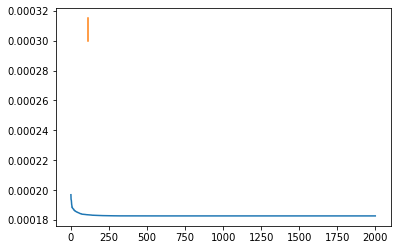

In [24]:
import matplotlib.pyplot as plt

plt.plot([i for i in range(2000)],genes[0:2000])
plt.plot([110,110,110],[.0003,.0003,.000315])

find_knee(genes)

In [73]:
sc.tl.rank_genes_groups(normed, 'PhenoGraph_clusters', method='wilcoxon', key_added = "wilcoxon")

mwu=pd.DataFrame()
for i in np.unique(normed.obs["PhenoGraph_clusters"]):
    genelist=[]
    counts=0
    ttest_ii=sc.get.rank_genes_groups_df(normed,key='wilcoxon',group=str(i))["names"]
    j=0
    while counts<=200:
        if ("MT-" not in ttest_ii[j]) and ("RPS" not in ttest_ii[j]) and ("RPL" not in ttest_ii[j]):
            genelist.append(ttest_ii[j])
            counts+=1
        j+=1
        
    mwu["Cluster "+str(i)]=genelist

In [24]:
types = normed.obs["celltype"]
cluster_type=[]
for i in np.unique(normed.obs["PhenoGraph_clusters"]):
    counts={}
    for j in range(len(types)):
        if normed.obs["PhenoGraph_clusters"][j]==i:
            if types[j] in counts:
                counts[types[j]]=counts[types[j]]+1
            else:
                counts[types[j]]=1
    cluster_type.append(max(counts,key=counts.get))

cluster_level_types=[]
for i in range(len(types)):
    cluster_level_types.append(cluster_type[int(normed.obs["PhenoGraph_clusters"][i])])

normed.obs["cluster_level_types"]=cluster_level_types